# RUN THE BOTTOM CHUNK OF CODE AS SOON AS YOU OPEN THIS 

Scroll to the bottom and run the two large cells that say HEY RUN THIS and HEY RUN THIS 2!!!

Sorry this is painful it has to do with the fact that juypter notebooks can't call things like plotting in line (matplotlib) or generating windows(cv2) from a .py  they need to be defined in the notebook as as far as I know. 


## common troubleshooting solutions:

1. make sure your file paths use these slashes / and end with a / 
2. make sure you run the two blocks of code at the bottom
3. are you in the righ file paths?
4. is your info file the same name as your tif file?

### NOTE: This is a 'cleaned' copy of the OMM_Analysis from the lab's github I made from running data from ONI using TIFF files. If you have something  else, this is not for you.   
  
    

In [3]:
import sys

sys.path.append('D:/Amanda/OMM_Analysis/OMM_Analysis/sma/') #if you are not amanda, change to your sma file path (found in zipfile downloaded from github)

from ffpdax import ffp_dax
from ffptif import ffp_tif

analysisPath='D:/Amanda/OMM_Analysis/OMM_Analysis/DATA/20220331_Proflavine_Base2DORBIT_exp8/IB_10hz_10laser_10uM_on/pos_0/' 

xmlName='ORBIT_Analysis_Settings'

analysisName='Proflavine_Base2DORBIT_exp8_IB_10hz_10laser_10uM_on_posXY0_channels_t0_posZ0'

xmlFilename=analysisPath+xmlName
filename=analysisPath+analysisName
ffp_tif(filename,xmlFilename)

In [6]:
import os
newpath = filename+'trcsv'
if not os.path.exists(newpath):
    os.makedirs(newpath)    #makes a new folder in with same name as filename but ending in trcsv
    
from tr2csv import tr_2csv
tr_2csv(filename)           #Generates CSV file from .tr files      

## 2D histogram stuff



In [4]:
import numpy as np

histInfoName=filename+'trdir/histpar' # opens the infromation file
histInfoFile = open(histInfoName+'.info','rb')
histInfo=np.fromfile(histInfoFile,dtype='int32')
histInfoFile.close()
print("Number of peaks")
print(histInfo[3])
histInfo[3]

Number of peaks
42


42

In [5]:
print(16416/16/18) # i think this is just to make sure it runs, im scared to remove it lol

#display settings for tracjectories
histPerCol=7
histPerRow=6

57.0


In [6]:
#when you run this, you should get a pop up window. check your windows bar at the bottom of the deskstop  
import numpy as np
from PIL import Image
import argparse
import cv2


[refptnp,refsc,refcol,sum_of_rows, out]=disp_hist(filename,histPerCol,histPerRow) #change for dax
print('pk, t1 ,t2')
print(out)


[  30    0 1000]
[  30    0 1000]
[  31    0 1000]
[  31    0 1000]
[  32    0 1000]
[  32    0 1000]
[  33    0 1000]
[  33    0 1000]
[  34    0 1000]
[  34    0 1000]
[  21    0 1000]
[  21    0 1000]
pk, t1 ,t2
[[  30    0 1000]
 [  30    0 1000]
 [  31    0 1000]
 [  31    0 1000]
 [  32    0 1000]
 [  32    0 1000]
 [  33    0 1000]
 [  33    0 1000]
 [  34    0 1000]
 [  34    0 1000]
 [  21    0 1000]
 [  21    0 1000]]


In [53]:
#Remeber python indexs from 0 so if you want your first selection to be the peak you analyze pick 0
#also the peaks go in paired sets, the first two selections will be "peak 0"

chosenpk=1

In [54]:
pk=str(out[chosenpk*2,0]).zfill(5)
frStart=out[chosenpk*2,1]
frEnd=out[((chosenpk*2)+1),2] 
print("Peak: "+pk)
print("Start: "+str(frStart))
print("End: "+str(frEnd))

Peak: 00031
Start: 0
End: 1000


In [23]:
#manual - dont run this if u just chose a peak in the cell above this
pk=str('00038')
frStart=0
frEnd=999

In [55]:

title='DORA Exp 8 - 10uM on - Peak ' +pk

csvpath=filename+'trcsv/'


csvnum=csvpath+pk+'.csv'

print(csvnum)

D:/Amanda/OMM_Analysis/OMM_Analysis/DATA/20220331_Proflavine_Base2DORBIT_exp8/IB_10hz_10laser_10uM_on/pos_0/Proflavine_Base2DORBIT_exp8_IB_10hz_10laser_10uM_on_posXY0_channels_t0_posZ0trcsv/00031.csv


## Graphing Paramaters below
#if anyone knows how to code this so allow us to save stuff in the folder that'd be super cool
    

filename: D:/Amanda/OMM_Analysis/OMM_Analysis/DATA/20220331_Proflavine_Base2DORBIT_exp8/IB_10hz_10laser_10uM_on/pos_0/Proflavine_Base2DORBIT_exp8_IB_10hz_10laser_10uM_on_posXY0_channels_t0_posZ0trcsv/00031.csv    |  pixel_size: 117  |  time_step: 100
frame_start: 0  |    frame_end: 250  |  bin_size: 3
processing: none  |  plot_type: 2D  |  title: DORA Exp 8 - 10uM on - Peak 00031
X_axis_label: x (nm)  |  Y_axis_label: y (nm)  |  Z_axis_label: Time (ms)


UnboundLocalError: local variable 'p' referenced before assignment

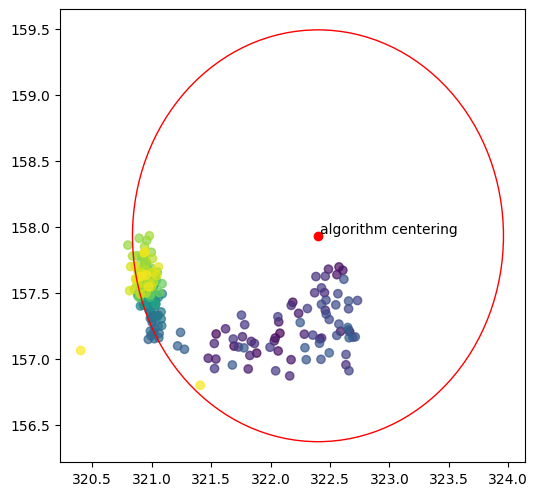

In [66]:
#### you might need to change the time step: 10hz= 100 ms, 100hz = 10ms
parameters = {
'file_name': csvnum, #100521_analysis 103018_analysis
'pixel_size': 117, # in nanometers
'time_step': 100, # in miliseconds
'frame_start':frStart, # enter 0 to start from beginning of dataset
'frame_end': 250, #frEnd, # enter -1 to end at the last value of the data set
'find_center_coordinates': 'yes', # 'yes' for first run, 'no' after center has been determined
'bin_size': 3, # bin size for downsample/filter processing
'processing': "none", # enter downsample, filter, or none
'plot_type': "2D", # enter 2D, 3D, grid, angular, angular_continuous, interactive or animated 
'title': title,
'x_axis_label': "x (nm)",
'y_axis_label': "y (nm)",
'z_axis_label': "Time (ms)",
'unit': "nm",  # enter pixel or nm 
'frames_per_plot': 25, #refers to grid plot
'columns': 7,# columns of plots (grid plot)
'frame_speed': 10, # for animation only
'tail_length': 10, # for animation only
'pixel_min': -0.75,
'pixel_max': 0.75,
'axis_increment_pixel': 7, #change axis increments for nicely fitting tick marks (pixel)
'nm_min': -150,
'nm_max': 150,
'axis_increment_nm': 7, #change axis increments for nicely fitting tick marks (nm)
'fig_size_x':40, #adjust display parameters for graphs to fit nicely, mostly used for multi_plot 
'fig_size_y': 40,
'save_plot': 'no'}

DORA(**parameters)

In [61]:
#### you might need to change the time step: 10hz= 100 ms, 100hz = 10ms
parameters = {
'file_name': csvnum, #100521_analysis 103018_analysis
'pixel_size': 117, # in nanometers
'time_step': 100, # in miliseconds
'frame_start':frStart, # enter 0 to start from beginning of dataset
'frame_end': 250, #frEnd, # enter -1 to end at the last value of the data set
'find_center_coordinates': 'no', # 'yes' for first run, 'no' after center has been determined
'bin_size': 3, # bin size for downsample/filter processing
'processing': "none", # enter downsample, filter, or none
'plot_type': "angular_continuous", # enter 2D, 3D, grid, angular, angular_continuous, interactive or animated 
'title': title,
'x_axis_label': "x (nm)",
'y_axis_label': "y (nm)",
'z_axis_label': "Time (ms)",
'unit': "nm",  # enter pixel or nm 
'frames_per_plot': 25, #refers to grid plot
'columns': 7,# columns of plots (grid plot)
'frame_speed': 10, # for animation only
'tail_length': 10, # for animation only
'pixel_min': -0.75,
'pixel_max': 0.75,
'axis_increment_pixel': 7, #change axis increments for nicely fitting tick marks (pixel)
'nm_min': -150,
'nm_max': 150,
'axis_increment_nm': 7, #change axis increments for nicely fitting tick marks (nm)
'fig_size_x':40, #adjust display parameters for graphs to fit nicely, mostly used for multi_plot 
'fig_size_y': 40,
'save_plot': 'no'}

DORA(**parameters)

filename: D:/Amanda/OMM_Analysis/OMM_Analysis/DATA/20220331_Proflavine_Base2DORBIT_exp8/IB_10hz_10laser_10uM_on/pos_0/Proflavine_Base2DORBIT_exp8_IB_10hz_10laser_10uM_on_posXY0_channels_t0_posZ0trcsv/00031.csv    |  pixel_size: 117  |  time_step: 100
frame_start: 0  |    frame_end: 250  |  bin_size: 3
processing: none  |  plot_type: angular_continuous  |  title: DORA Exp 8 - 10uM on - Peak 00031
X_axis_label: x (nm)  |  Y_axis_label: y (nm)  |  Z_axis_label: Time (ms)


# HEY! RUN THIS: 

In [11]:
def disp_hist(file,perCol,perRow):

    
    #Get file paths
    sets=file+'trdir/histsets'
    filename=file+'trdir/hist2d'
    infor=file+'trdir/histpar'
    
    #open files
    fileptr = open(filename+'.stack','rb')
    fileptrSets = open(sets+'.list','rb')
    fileptrInfo = open(infor+'.info','rb')
    

    #Get Infor from files 
    frame = np.fromfile(fileptr,dtype='int32')
    histlist=np.fromfile(fileptrSets,dtype='int32')
    histinfo=np.fromfile(fileptrInfo,dtype='int32')
    histsearch=np.reshape(histlist,[len(histlist)//3,3])
    #print(frame.shape)
    #print(histlist.shape)
    #print(histinfo.shape)

    histnum=histinfo[3]  #number of histograms
    histrow=int(histnum//perCol) #number of histograms / number of histograms per col to give number per row 
    
    res=histinfo[0]   #get the 'res' as defined in 2D hist this is the size of the histogram 30x30


    
    
    #Openining the Histogram and making an Image. 
    fileptr.seek(0) #Get the first frame 

    result = Image.new('F', (histrow*res,perCol*res)) #make a new image of correct size 
    for j in range (0,histrow):    
        for i in range (0,perCol):
        #print((i+(j*histpercol)))
            fileptr.seek((i+(j*perCol))*res*res*4)  #open frame poisiton x resolution *32/8 (8 bit vs 32 bit)
            frame2 = np.fromfile(fileptr,dtype='int32',count=res*res)
            frame2 = np.reshape(frame2,[res,res])
            frame2 = np.transpose(frame2)
            frame2 = np.rot90(np.rot90(np.rot90(frame2)))
            frame2=frame2
            im2 =Image.fromarray(frame2)
        #print(i)
            result.paste(im2, box=((j*res),(i*res))) #load each histogram into the total histogram image. 
       
    
   

    img = np.array(result) 

    #result.show(result)
    avgnonzero = img[np.nonzero(img)].mean() #this might be bad practice 
    img=np.array((img/avgnonzero)*255).astype('uint8')#but here i am sclaing my image based on avg non zero to gray scale 
                                                        # This is only for display and it works fairly well but may be something that we want to return to. 



    

    grayImage = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  #Converts image to gray scale
    heatmap = cv2.applyColorMap(grayImage, cv2.COLORMAP_MAGMA)  #converst grey scale to color map magma 
    
    refPt = []
    
    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            #print(x+(k*histperrow*30),",",y)
            imgpkdisp=[((x+(k*perRow*30))//30*perCol),y//30] #Converting X and y of click to position on histogram as a grid. K s frame number. Scale by 30 because of size of histogram. 
            imgpkdisp=sum(imgpkdisp)  # This is the exact histogram number. based off frame, and which position
            imgpkdisp=histsearch[imgpkdisp] # now we use that info to find the hisgram in the  info file 
            imgpkdisp=str(imgpkdisp)
            print(imgpkdisp)
            refPt.append([x+(k*perRow*30),y]) #This stores the histograms selected. 
            font = cv2.FONT_HERSHEY_SIMPLEX
            strXY = str(x+(k*perRow*30) )+", "+str(y)
            cv2.putText(imgcrop, imgpkdisp, (x,y), font, 0.5, (255,0,0), 2) #Draw coordinates on image. 
            cv2.imshow('2D Histogram [PK# t1 t2]',imgcrop)
    
    savePt=[]
    testvar=0
    t=img.size//((perCol*30)*perRow*30)
    
    k=0
    
    #Load in frames for searching
    while k < t:
        imgcrop=heatmap[0:(perCol*30),k*perRow*30:(k+1)*30*perRow]  #Display each frame as a heat map. 
        cv2.imshow('2D Histogram [PK# t1 t2]',imgcrop )
        cv2.namedWindow('2D Histogram [PK# t1 t2]')
        cv2.setMouseCallback('2D Histogram [PK# t1 t2]', click_event)
        key=cv2.waitKey(0)
        if key == 27: #if escape key break the loop
            break
        elif key==98:  # if b go backwards
            if k == 0:
                k=k
            else:
                k=k-1  # any other key go forward
        else:
            k=k+1
        
   # for k in range (0,t):
       # print(k)
       # imgcrop=heatmap[0:(perCol*30),k*perRow*30:(k+1)*30*perRow]
       # cv2.imshow('heatmap',imgcrop )
       # cv2.namedWindow('heatmap')
       # cv2.setMouseCallback("heatmap", click_event)
       # key=cv2.waitKey(0)
        #if key == 27:
        #    break
        #elif key == 98:
            #print(k)
        
        
            
    cv2.destroyAllWindows()
    refptnp=np.array(refPt)  #stored histogram positions
    #print(refptnp)
    refsc=refptnp//30     # scale to histogram number per frame
    refcol=refsc*[perCol,1]  # Scale to be histogram number on right frame 
    sum_of_rows = np.sum(refcol, axis = 1)  #sum to get historgram number
    out=histsearch[sum_of_rows] #search  histogram info to get pk# and T1 T2. 
    return refptnp , refsc , refcol ,sum_of_rows , out   #Return Relevant vars. 

# HEY! RUN THIS 2: 

filename: D:/Amanda/OMM_Analysis/OMM_Analysis/DATA/20220331_Proflavine_Base2DORBIT_exp8/IB_10hz_10laser_10uM_on/pos_0/Proflavine_Base2DORBIT_exp8_IB_10hz_10laser_10uM_on_posXY0_channels_t0_posZ0trcsv/00031.csv    |  pixel_size: 154  |  time_step: 20
frame_start: 0  |    frame_end: -1  |  bin_size: 3
processing: none  |  plot_type: 2D  |  title: RecBCD
X_axis_label: x (nm)  |  Y_axis_label: y (nm)  |  Z_axis_label: Time (ms)


UnboundLocalError: local variable 'p' referenced before assignment

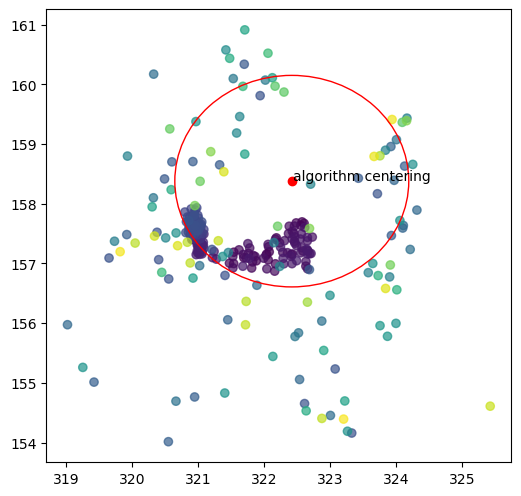

In [64]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.art3d import Line3DCollection 
from matplotlib import ticker
import math
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython import display
import random
import itertools
from matplotlib.widgets import Slider, Button
from IPython.core.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128 #allows for large java HTML


#affects plot presentation
%matplotlib inline 


parameters = {
#Initial required parameters
'file_name': csvnum,
'pixel_size': 154, # in nanometers
'time_step': 20, # miliseconds per frame in trajectory movie
'frame_start': 0, # enter 0 to start from beginning of dataset
'frame_end': -1, # enter -1 to end at the last value of the data set
'find_center_coordinates': 'yes', # 'yes' for first run, 'no' after center has been determined
#Secondary required parameters  
'plot_type': "2D",# enter 2D, 3D, grid, angular, angular_continuous, interactive, animated or HTML     
'bin_size': 3, # bin size for downsample/filter processing
'processing': "none", # enter downsample, filter, or none
'unit': "nm",  # enter pixel or nm 
#Labeling parameters 
'title': "RecBCD",
'x_axis_label': "x (nm)",
'y_axis_label': "y (nm)",
'z_axis_label': "Time (ms)",
#Formatting parameters 'grid' plot
'frames_per_plot': 25, #refers to grid plot
'columns': 7,# columns of plots (grid plot)
#Formatting parameters 'animation' plot
'frame_speed': 20, # for animation only (ms)
'tail_length': 50, # for animation only
#Formatting parameters all plots  
'pixel_min': -0.75, # setting min/max axis range (pixel)
'pixel_max': 0.75,
'axis_increment_pixel': 7, #change axis increments for nicely fitting tick marks (pixel)
'nm_min': -150, # setting min/max axis range (nm)
'nm_max': 150,
'axis_increment_nm': 7, #change axis increments for nicely fitting tick marks (nm)
'fig_size_x': 40, #adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot 
'fig_size_y': 40,
#Save figures
'save_plot': 'no'} 


def DORA(file_name,pixel_size,time_step,frame_start,frame_end,find_center_coordinates,bin_size,processing,plot_type,title,x_axis_label,y_axis_label,z_axis_label,unit, frames_per_plot, columns, pixel_min, pixel_max, nm_min, nm_max,axis_increment_pixel,axis_increment_nm, fig_size_x, fig_size_y, frame_speed, tail_length, save_plot):
       
              
        print(*['filename:', file_name, '   | ' , 'pixel_size:', pixel_size , ' | ' , 'time_step:', time_step])
        
        print(*['frame_start:', frame_start,' |   ','frame_end:', frame_end, ' | ', 'bin_size:', bin_size])
        
        print(*['processing:', processing, ' | ',  'plot_type:', plot_type,' | ' ,'title:', title])
        
        print(*['X_axis_label:',x_axis_label,' | ',  'Y_axis_label:',y_axis_label ,' | ' ,'Z_axis_label:', z_axis_label])
        if plot_type == 'grid':
            print(*['columns:', columns, '|', 'frames_per_plot:', frames_per_plot])
        if plot_type == 'animated':
            print(*['frame_speed:', frame_speed, '|', 'tail_length:', tail_length])
        
    
        #read data file into a pandas data frame, add an index counter, and label columns
        data = pd.read_csv(file_name, header = None)
        data = data.replace(0, np.nan) 
        #data = data.dropna()
        data['index'] = range(len(data))
        data.columns = ['X position', 'Y position','index']
        data=data[['index','X position','Y position']]
        
        
        
        ## CENTERING ALGORITHM ##
        if find_center_coordinates == 'yes':
            #establish empty lists
            ave_y = []
            ave_x = []
            stand = []
            
            #find uniform guesses in range of max and min unaltered data values for y position
            #THE NUMBER OF UNIFORM GUESSES IS CURRENTLY HARD CODED AT 50 FOR X AND Y, CULMULITIVE 2,500
            guess_y = np.linspace(data.iloc[frame_start:frame_end,2].max(), data.iloc[ frame_start:frame_end,2].min(), 50)
            #put into list
            guess_y = guess_y.tolist()
            # find guesses for x position
            guess_x =np.linspace(data.iloc[frame_start:frame_end,1].max(), data.iloc[frame_start:frame_end,1].min(), 50)
            guess_x = guess_x.tolist()
            
            

            #permute each x and y center guess together to create 10,000 unique center guesses
            center_guesses = list(itertools.product(guess_x, guess_y))
            # store center guesses in dataframe
            c = pd.DataFrame(center_guesses, columns = ['X','Y'])
            # set up list to store average distances (radius) of circular trajectory path
            ave_distance = []
            # set up list to store standard deviation of distances to each point in the trajectory
            stand = []
            j = 0
            for j in range(len(c)): # chnage to range(len(c))
                # find the distance between each point in a dataframe against guess[i]
                distance = np.power(((data["X position"]- c['X'][j])**2 + (data["Y position"]- c['Y'][j])**2),0.5)
                # store distances in a dataframe
                d = pd.DataFrame(distance, columns = ['distance'])
                # find average of distances (this would be the radius)
                ave_d = d['distance'].mean(axis = 0)
                # store all average distances from each guess[i] distance dataframes into list
                ave_distance.append(ave_d)
                # find standard deviation of center distance from each point in trajectory for each guess[i]
                std = d['distance'].std(axis = 0)
                # store each standard deviation in a list  
                stand.append(std)

                j += 1
            # put radius and std lists in a dataframe    
            c['average_distance'] = ave_distance
            c['std'] = stand


            # this block finds the row with the lowest std, the corresponding radius and x,y coordinates for the center
            # want to return row with lowest std
            target_row = c['std'].idxmin()
            # x center guess with lowest std
            center_x = c.loc[target_row,'X']
            # y center guess with lowest std
            center_y = c.loc[target_row,'Y']
            #radius of trajectory
            dist = c.loc[target_row,'average_distance']


            # Our regularly scheduled 2D graphing program
            fig = plt.figure(figsize=(6,6), dpi=100)
            ax = fig.add_subplot(111)#121 # 1X1 grid plot 1, subplot(222) would be 2X2 grid plot 2, (223)--> 2X2 plot 3

            #color bar color scheme assignment, graph type, colorbar size and alignment
            colors = cm.viridis(np.linspace(0, 1, len(data.iloc[frame_start:frame_end,1])))
            ax.scatter(data.iloc[frame_start:frame_end,1], data.iloc[frame_start:frame_end,2],c= colors, alpha = 0.7)
            
            # add a red dot to indicate center of trajectory
            ax.scatter(center_x, center_y, color = 'red')
            plt.text(x = center_x +0.02, y = center_y +0.02, s = 'algorithm centering')

            # add a circle with center at our best guess and radius derived from our best guess 
            circle = plt.Circle((center_x, center_y), dist, color='r', fill=False)
            ax.add_patch(circle)
            
            #Colorbar parameters below if we want one in the future

            cbar = plt.colorbar(p, label= 'time' ,shrink= .82) #

            #setting the ticks on the colorbar to span the length of the time column with 6 increments
            cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1]) 

            tix = np.linspace(0,len(data),6, dtype = int) # forces colorbar to show time in integers
            tix_c = tix*20
            cbar.set_ticklabels(tix_c) 
            
            plt.axis('square') #INTEGRAL to maintaining aspect ratio
            plt.xticks(rotation=45)
            ax.set_xlabel('X position (unaltered)', fontweight = 'bold', fontsize = 14)
            ax.set_ylabel('Y position (unaltered)', fontweight = 'bold', fontsize = 14)

            # plot title and font configurations
            plt.title('Algorithm Center Guess' , fontweight = 'bold', fontsize = 16)
            plt.show()
            
            
            #below is the key to maintaining the value of the center variable once the user satisfaction is achieved
            global center
            
            center =(center_x,center_y)
            
            print('The center is {0}'.format(center))
            print('If the center is satisfactory, change the find_center_coordinates parameter to no')
            print('If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again')
            
            return
         
            









        
        
        
        
        ## DATA NORMILIZATION AND UNIT ASSIGNMENT ##

        # find the average of X and Y column respectively
        ave = data.mean(axis=0)
        

        #substract averages from each column to find displacement, store into new columns
        data["X displacement (pixels)"] = data['X position'] - center[0]
        data["Y displacement (pixels)"] = data['Y position'] - center[1]
        # mutiply pixel displacement columns by scaler to find nm displacement, store in new columns
        data["X displacement (nm)"] = data['X displacement (pixels)']*pixel_size
        data["Y displacement (nm)"]= data['Y displacement (pixels)']*pixel_size
        # multiply the index counter column by time_step to make a time step column, store into new column 
        data["Time (ms)"] = data['index']*time_step
        # drop all NaN values *not a number
        data = data.dropna() 
        
        #drop NAN try to conserve time (what if we have NAN in x and not in Y? need to drop the whole row)
        
       
        ## PROCESSING BLOCK ##

            
        ##Simple Moving Average or "filter" dataframe:
        ma = pd.DataFrame(data.iloc[:,0],columns=['index'])

        window = bin_size
        #Built in simple moving average function is applied to normal data and stored in dataframe "ma"
        ma['X movement' ] = data.iloc[:,1].rolling(window=window).mean()
        ma['Y movement'] = data.iloc[:,2].rolling(window=window).mean()
        ma['X displacement (pixels)'] = data.iloc[:,3].rolling(window=window).mean()
        ma['Y displacement (pixels)'] = data.iloc[:,4].rolling(window=window).mean()
        ma['X displacement (nm)'] = data.iloc[:,5].rolling(window=window).mean()
        ma['Y displacement (nm)'] = data.iloc[:,6].rolling(window=window).mean()
        ma['Time (ms)'] = data.iloc[:,7].rolling(window=window).mean()

        #This block delets the null spaces in the new dataframe and realigns the data
        ma = ma.apply (pd.to_numeric, errors='coerce')
        ma = ma.dropna()
        ma = ma.reset_index(drop=True)
       
        
        
        
        
        
        ##Downsampling dataframe:
        da=pd.DataFrame(data.iloc[:,:])
        #divide original index by sample size and round to nearest whole number to 
        #achieve new index number underwhich the origial index is stored
        u= math.floor(frame_start/bin_size)
        v= math.floor(frame_end/bin_size)

        #isolate the column (if we print this it will show as a dataframe with 2 cols: indexes and time values)
        daT_column=da.iloc[:,7]
        daDY_column=da.iloc[:,6]
        daDX_column=da.iloc[:,5]
        daPY_column=da.iloc[:,4]
        daPX_column=da.iloc[:,3]
        daI_column=da.iloc[:,0]
        daX_column=da.iloc[:,1]
        daY_column=da.iloc[:,2]
        #We just want the values in the column
        daT = daT_column.values
        daDY = daDY_column.values
        daDX = daDX_column.values
        daPY = daPY_column.values
        daPX = daPX_column.values
        daI = daI_column.values
        daX = daX_column.values
        daY= daY_column.values
        #This function taken from https://stackoverflow.com/questions/10847660/subsampling-averaging-over-a-numpy-array
        # allows us to downsample by averages over a set number 
        #(change 'n' to the number of values you want to average over)
        def average(arr, n):
            end =  n * int(len(arr)/n)
            return np.mean(arr[:end].reshape(-1, n), 1)
        #Takes a column from our 'da' dataframe and runs the function over it
        #stores the new values in variables as an array (values in a row)

        #assigning each new row to a varialble
        Time = average(daT,bin_size)
        Index = average(daI,bin_size)
        Xda = average(daX,bin_size)
        Yda = average(daY,bin_size)
        Ydisnm = average(daDY,bin_size)
        Xdisnm = average(daDX,bin_size)
        YdisP = average(daPY,bin_size)
        XdisP = average(daPX,bin_size)

        #reshaping the data in a 1D column
        TimeT = Time[:, np.newaxis]
        YdisnmT = Ydisnm[:, np.newaxis]
        XdisnmT = Xdisnm[:, np.newaxis]
        YdisPT = YdisP[:, np.newaxis]
        XdisPT = XdisP[:,np.newaxis]
        XdaT = Xda[:, np.newaxis]
        YdaT = Yda[:,np.newaxis]
        IndexT = Index[:,np.newaxis]

        #stores in a new dataframe 'dsa' for: downsampling average
        dsa= pd.DataFrame(IndexT, columns=['index'])
        #appending to our data frame
        dsa['X movement'] = XdaT
        dsa['Y movement'] = YdaT
        dsa['X displacement (pixels)'] = XdisPT
        dsa['Y displacement (pixels)'] = YdisPT
        dsa['X displacement (nm)'] = XdisnmT 
        dsa['Y displacement (nm)'] = YdisnmT
        dsa['Time (ms)'] = TimeT
        
        ## FOR MULTIPLE PLOTS
        # Function for 2D plot parameters (called when user asks for multiple plots)
        # the grid_plot graph type runs best when this function is defined here and is called under plot_type == grid_plot if statement
        def do_plot(ax):
            #regular graphing parameters for 2D graph (color of scatter, size, shape, tick marks, etc.)
            colors = cm.Greens(np.linspace(0, 1, len(z)))
            p=ax.scatter(x, y, c=colors)
            #fig = plt.figure(figsize=(6,6), dpi=100)
            tix = np.linspace(0,len(z),6)
            #tix_c = tix*time_step
            #cbar2.set_ticklabels(tix_c)
            plt.axis('square')
            plt.xticks(rotation=45)
            if unit == "pixel":
                ax.set_xlim(pixel_min, pixel_max) 
                ax.set_ylim(pixel_min, pixel_max)
                ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))# change to 5 for increments of .5
                ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))
                ax.grid()
            if unit == "nm":
                ax.set_xlim(nm_min, nm_max) 
                ax.set_ylim(nm_min, nm_max)
                ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                ax.grid()

        
        #future processing methods to be added below:
        
        
        
        
        
        #DETERMINE PROCESSING AND UNIT TYPE:
        #if more processing methods are to be added, an if statement must be
        #added with a key word to select that data frame
        # "df" becomes the variable used in the graphing block below
        if processing == "none":
            df = data
        if processing == "filter":
            df = ma
        if processing == "downsample":
            df = dsa
            frame_start = math.floor(frame_start/bin_size)
            frame_end = math.floor(frame_end/bin_size)
        
        
        ### DATA PROCESSING FOR COORDINATE CONVERTION ###
        #theta = (0,360) and thetac =(-infinity degrees, infinity degrees)
        # radian to degree conversion
        r2d = 180/np.pi
        #arctan2 is the full unit circle conversion (-pi,pi) as opposed to (-pi/2,pi/2)
      
        df_filter =pd.DataFrame(df.iloc[:,0])
        #find radius
        df_filter['radius'] = np.power( np.power(df['Y displacement (pixels)'],2) + np.power(df['X displacement (pixels)'],2), 0.5 )
        #find theta arctan2 is the full unit circle conversion (-pi,pi) as opposed to (-pi/2,pi/2)
        df_filter['theta'] = -np.arctan2(df['Y displacement (pixels)'],df['X displacement (pixels)'])*r2d 
        df_filter['Time (ms)'] = df['Time (ms)']
        # if r is greater than a certain value, the entire row of this dataframe is stored into the next dataframe
        df_theta = df_filter.loc[df_filter['radius'] > 0.167].copy() # we conserve the other columns where the row meets the requirement
        # need the .copy() at the end of the line above due to clarity, we want to alter the dataframe to make df_theta, not df_filter
        #arctan2 is the full unit circle conversion (-pi,pi) as opposed to (-pi/2,pi/2)
        #add 360 onto the 3rd and 4th quadrant values to make range from (0,360)
        df_theta.loc[df_theta.theta < 0, ['theta']] += 360#df_theta is our (0,360) dataframe
        
         
        
        #make dataframe for angular continuous (base dataframe changes with user preferences)
        angularc = pd.DataFrame(df_theta.iloc[:,2]) # df_theta.iloc[:,2] is the (0,360) theta range
        angularc.columns = ['theta']
        
        #add a row of zeros at the top and reset index
        zero_row = pd.DataFrame({'theta': 0}, index=[0])
        angularc = pd.concat([zero_row, angularc]).reset_index(drop = True)
        
        # find displacement between rows (row[i+1]-row[i])
        angularc['displacement'] = angularc.diff()# find displcement between rows
        angularc= angularc.apply (pd.to_numeric, errors='coerce')
        angularc = angularc.dropna() #drop the NANs if there are any
        angularc = angularc.reset_index(drop=True) #reset the index
        angular_vector = angularc['displacement'].values #store the dataframe into an array
        angular_vectorT = angular_vector.T # transpose the array into a row vector
        
        
        #Now we have displacement between rows
        # if the displacement between two rows is greater than 180, subtract 360 (we assume the rotor went backward)
        # if the displacement between two rows is less than 180, add 360 (we assume the rotor went forward)
        # so we edit the displacement to reflect the rotor movement
        
        angular_vectorT[angular_vectorT >=(180)] -= 360
        
        angular_vectorT[angular_vectorT <=(-180)] += 360
        
        #angular_vectorT[sqrt(x**2+(y)**2) < 0.166] = NaN # get this to work
        #df['Y displacement (pixels)']**2 + df['X displacement (pixels)']**2
        
        #store it back in a pandas dataframe
        disp = angular_vectorT.T
        cont_rotation = pd.DataFrame(disp, columns=['theta displacement correction'])
        
        # add a row of zeros to the top so we conserve the first row
        zero_row = pd.DataFrame({'theta displacement correction': 0}, index=[0])
        cont_rotation = pd.concat([zero_row, cont_rotation]).reset_index(drop = True)
        #enact a culmulitive sum function that adds together all displacements that came before each row
        cont_rotation['continuous theta'] = cont_rotation.cumsum()
        #drop the NAN and or first row of zeros to start at the actual first data point
        cont_rotation= cont_rotation.apply (pd.to_numeric, errors='coerce')
        
        cont_rotation = cont_rotation.dropna()
        cont_rotation = cont_rotation.reset_index(drop=True)
        cont_rotation.drop(index = cont_rotation.index[0], axis = 0, inplace = True)
        cont_rotation = cont_rotation.reset_index(drop=True) # cont_rotation is our (-infinity,infinity) degree rotation dataframe
        #Now we have a dataframe called cont_rotation that has 2 columns
        # first column is displacement with the correction and second column is the culmulitive sum of the first col
        # 'continuous theta' is the cumulitive sum of the displacements
        
        ## Something to look into ##
        #the assumption there is that even though that jump looks like a backwards jump of ~175 degrees, it’s close enough to 180 degrees that the direction could have been mistaken.
        #and if we are unsure if we are mistaken then let’s look at surrounding frames to get a hint for which direction it is going
        #have to do this after calc theta culmulitive
    
        ## GRAPHING DATA ASSIGNMENT BLOCK##
            
        # Here the code determines the units of the graph, only for cartesian graphs   
        if unit == "pixel":
            x_unit = 3
            y_unit = 4
        if unit == "nm":
            x_unit = 5
            y_unit = 6
        
        #assign values of x y and z
        x = df.iloc[frame_start:frame_end,x_unit] # move this outside this block to apply for all "none"
        y = df.iloc[frame_start:frame_end,y_unit]
        z = df.iloc[frame_start:frame_end,7] #col 7 is the time col 
       
        #Assign theta(0,360), time, and theta(-infinity,infinity)-->(continuous degree rotation)
        theta = df_theta.iloc[frame_start:frame_end,2]
        t = df_theta.iloc[frame_start:frame_end,3]
        
        thetac = cont_rotation.iloc[frame_start:frame_end,1]
        
        #determine number of plots from amount of frames desired in each plot
        j = int(math.ceil(len(df)/frames_per_plot))
        if plot_type == 'grid':
            print(*['number of plots:',j])
        
        #GRAPHING BLOCK
            
        if plot_type == "2D":
            
            fig = plt.figure(figsize=(6,6), dpi=100)
            ax = fig.add_subplot(111) # this comand is here to take advantage of the "axes" plotting library

            #color bar color scheme assignment, graph type, colorbar size and alignment
            colors = cm.viridis(np.linspace(0, 1, len(z)))
            p=ax.scatter(x, y, c=colors, alpha = 0.7)
            cbar = plt.colorbar(p, label= z_axis_label ,shrink= .82) 

            #setting the ticks on the colorbar to span the length of the time column with 6 increments
            cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1]) 

            tix = np.linspace(0,len(z),6, dtype = int) # forces colorbar to show time in integers
            tix_c = tix*time_step
            cbar.set_ticklabels(tix_c) 
            plt.axis('square')
            plt.xticks(rotation=45)

            #set graph limit conditions depending on unit specified
            if unit == "pixel":
                ax.set_xlim(pixel_min, pixel_max) 
                ax.set_ylim(pixel_min, pixel_max)
                ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))
                ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))
            if unit == "nm":
                ax.set_xlim(nm_min, nm_max) 
                ax.set_ylim(nm_min, nm_max)
                ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))




            #axis labels and font configurations
            ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
            ax.set_ylabel(y_axis_label, fontweight = 'bold', fontsize = 14)

            # plot title and font configurations
            plt.title(title , fontweight = 'bold', fontsize = 16)
            
            if save_plot == "yes":
                plt.savefig(title+"_2D.png") #put title input and date time


            
        if plot_type == "grid":
            i = 0
            dfs = np.array_split(df,j) # splits large dataframe into "j" equal dataframes
            #print (dfs[i]) #<--- command to print each dataframe # dataframe 0 is the first dataframe
            
            #this portion specifies subplot dimentions (N plots in 3 columns and amount of appropriate rows)
            cols = columns
            rows = int(math.ceil(j / cols)) #determining rows based on the number of graphs and columns

            gs = gridspec.GridSpec(rows, cols, wspace = .25, hspace = .25)# disallows overlap
            fig = plt.figure(figsize = (fig_size_x,fig_size_y))
            
            while i < j:
                    
                x = dfs[i].iloc[:,x_unit] 
                y = dfs[i].iloc[:,y_unit]
                z = dfs[i].iloc[:,7]
                ax = fig.add_subplot(gs[i])
                do_plot(ax)
                i+= 1
                   
            if save_plot == "yes":
                
                framestr = '{}'.format(frames_per_plot)
                plt.savefig(title+'_'+framestr+'_frames_per_plot'+'_gridplot.png', dpi=300)

        plt.show()
        
        
        # Angular plot
        
        if plot_type == "angular":
            import plotly.express as px

            fig = px.scatter(x = t, y = theta, title = title, width=1000, height=500)
           
            fig.update_traces(hovertemplate='Time (ms): %{x} <br>Theta: %{y}')
            
        
            fig.update_layout(
            xaxis_title="Time (ms)",
            yaxis_title="Theta (degrees)")
            

            fig.update_layout(
            yaxis = dict(
            tickmode = 'linear',
            tick0 = 360,
            dtick = 45))
            fig.show()
            
            if save_plot == "yes":
                fig.write_image(title+"_angular.png") 

           
            
        if plot_type == "angular_continuous":
            
            import plotly.express as px

            
            fig = px.line(x=t, y=thetac, title = 'Continuous Angular Rotation')
            fig.update_traces(hovertemplate='Time (ms): %{x} <br>Theta: %{y}')
            
            fig.update_layout(
            xaxis_title="Time (ms)",
            yaxis_title="Theta (degrees)")
            
            fig.update_layout(
            xaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 1000))
            
            fig.update_layout(
            yaxis = dict(
            tickmode = 'linear',
            tick0 = -360,
            dtick = 180))
            
            
                        
            fig.show()
            if save_plot == "yes":
                fig.write_image(title+"_angular_continuous.png") 

            
        #This block plots a static 3D graph if prompt is met
        if plot_type == "3D":


            #This block splices the segments between data points and assigns each segment to a color
            points = np.array([x,y,z]).transpose().reshape(-1,1,3)
            segs = np.concatenate([points[:-1],points[1:]],axis=1)
            lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
            lc.set_array(z)

            #This block plots the figure at a specified size, in 3D configuration, sets axis range, gathers the 
            #colored segments from above, and assigns labels
            fig = plt.figure(figsize=(8,8))
            ax = fig.gca(projection = '3d')
            ax.set_zlim(min(z), max(z))
            if unit == "pixel":
                ax.set_xlim(-1,1)
                ax.set_ylim(-1,1)
            if unit == "nm":
                ax.set_xlim(-150,150)
                ax.set_ylim(-150,150)
            ax.add_collection3d(lc, zs=z, zdir='z')
            plt.title(title , fontweight = 'bold', fontsize= 16)
            ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
            ax.set_ylabel(y_axis_label , fontweight = 'bold', fontsize = 14)
            ax.set_zlabel(z_axis_label, fontweight= 'bold' , fontsize =14)
            
            if save_plot == 'yes':
                plt.savefig(title+'_3D.png',dpi=300)

            plt.show()


        if plot_type == "interactive":

            #configure plot settings (currently called trace 1, may add more traces in the future)
            trace1=go.Scatter3d(x=x,
                                y=y,
                                z=z,
                                mode = "lines",
                                name = 'Original',
                                marker=dict(
                                    size=4,
                                    color='#e9ebf0',
                                    opacity=0.7,
                                    showscale=False,
                                    colorbar=dict(
                                        title='Time (ms)')),
                                line=dict(
                                    color='#e9ebf0',
                                    width=2))
            #assign traces
            fig = go.Figure(data=[trace1])

            #assign title
            fig.update_layout(title= title)
            #assign axis labels
            fig.update_layout(scene = dict(
                        xaxis_title= x_axis_label,
                        yaxis_title= y_axis_label,
                        zaxis_title= z_axis_label)) 

            #Here we can tweak the background color, grid color, and color of the origin for all axes/plane
            fig.update_layout(scene = dict(
                        xaxis = dict(
                             backgroundcolor="black",
                             gridcolor="gray",
                             showbackground=True,
                             zerolinecolor="white",),
                        yaxis = dict(
                            backgroundcolor="black",
                            gridcolor="gray",
                            showbackground=True,
                            zerolinecolor="white"),
                        zaxis = dict(
                            backgroundcolor="black",
                            gridcolor="gray",
                            showbackground=True,
                            zerolinecolor="white"),),
                      )

            #size and aspect ratio of the graph and the default camera zoom and angle 
            fig.update_layout(
            width=800,
            height=700,
            autosize=False,
            scene=dict(
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=1,
                    y=2,
                    z=2,
                )
            ),
            aspectratio = dict( x=1, y=1, z=4 ),
            aspectmode = 'manual'
            ),
            )
            
            

            fig.show()
            
            ## Easter Egg slider plot, cudos to the person who can get this to work properly ##
        if plot_type == 'slider':
            
            %matplotlib notebook
            #reassigning to a dataframe, setting up axis with empty list, aspect ratio
            coord = pd.DataFrame(x)
            coord.columns = ['x']
            coord['y'] = y
            fig = plt.figure()
            ax = fig.add_subplot(111)
            scat = ax.scatter(coord.x.values,coord.y.values) 
            plt.axis('square')

            
            # chosing units
            if unit == "pixel":
                    ax.set_xlim(pixel_min, pixel_max) 
                    ax.set_ylim(pixel_min, pixel_max)
                    ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))# change to 5 for increments of .5
                    ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))
                    ax.grid()
            if unit == "nm":
                    ax.set_xlim(nm_min, nm_max) 
                    ax.set_ylim(nm_min, nm_max)
                    ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                    ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                    ax.grid()
            ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 12)
            ax.set_ylabel(y_axis_label, fontweight = 'bold', fontsize = 12)

            # plot title and font configurations
            plt.title(title , fontweight = 'bold', fontsize = 16)
            

            axslider = plt.axes([0.125, 0.01, 0.775, 0.05])
            slider = Slider(axslider,'test', valmin=tail_length, valmax=1400, valinit=1, valstep=1, color = 'green')
            scat.set_offsets(np.c_[0,0])
            
            def update(val):
                
                
                i = int(slider.val)
                scat.set_offsets(np.c_[coord.x.values[i-tail_length:i],coord.y.values[i-tail_length:i]])
                cmap = plt.cm.Greens
                norm = plt.Normalize(vmin=0, vmax=10)
                z = np.array(range(tail_length))
                
                c = cmap(norm(z))
                scat.set_color(c)
                fig.canvas.draw_idle()
                print('test')
                return fig, scat,
            
            slider.on_changed(update)


            plt.show()
        if plot_type == 'slider':
            plt.show()
            return scat, slide, fig
            
        
        if plot_type == "animated" or plot_type == 'HTML':
            # allows for animation to animate
            %matplotlib notebook
            #reassigning to a dataframe, setting up axis with empty list, aspect ratio
            coord = pd.DataFrame(x)
            coord.columns = ['x']
            coord['y'] = y
            fig = plt.figure()
            ax = fig.add_subplot(111)
            sc = ax.scatter([], [])
            plt.axis('square')
            
            # chosing units
            if unit == "pixel":
                    ax.set_xlim(pixel_min, pixel_max) 
                    ax.set_ylim(pixel_min, pixel_max)
                    ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))# change to 5 for increments of .5
                    ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_pixel))
                    ax.grid()
            if unit == "nm":
                    ax.set_xlim(nm_min, nm_max) 
                    ax.set_ylim(nm_min, nm_max)
                    ax.yaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                    ax.xaxis.set_major_locator(ticker.LinearLocator(axis_increment_nm))
                    ax.grid()
            ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 12)
            ax.set_ylabel(y_axis_label, fontweight = 'bold', fontsize = 12)

            # plot title and font configurations
            plt.title(title , fontweight = 'bold', fontsize = 16)





            # animation function feeds a window of dataframe values into the graphing function at a time,
            # iterates over user specified range in dataframe with user specified tail length
            # color of animation is also specified here
            def animate(count):
                sc.set_offsets(np.c_[coord.x.values[count-tail_length:count],coord.y.values[count-tail_length:count]])
                cmap = plt.cm.Greens
                norm = plt.Normalize(vmin=0, vmax=tail_length)
                z = np.array(range(tail_length))
                c = cmap(norm(z))
                sc.set_color(c)
                #button_ax = plt.axes([.78, .87, .1, .07]) # creates an outline for a potential button
               
                return sc

            ani = FuncAnimation(fig, animate, interval= frame_speed, frames = len(coord)) #frames=len(df)
            #ani.toggle(ax=button_ax)# potential button toggle for a potential button ;)
            if save_plot == 'yes':
                
                ani.save(title+'_animation_gif.gif', writer='pillow', fps=10, dpi=100)





            plt.tight_layout()
            plt.show()
            # With out the added if statement below, the animated plot will not animate 
            #(due to being a nested function)
        if plot_type == 'animated': 

                

            return ani
        # 
        if plot_type == 'HTML':
            plt.close('all')
            if save_plot == 'yes':
                with open(title+"_animation_html.html", "w") as f:
                    print(ani.to_jshtml(), file=f)
            return HTML(ani.to_jshtml())
        

            
        
           




        
DORA(**parameters)